In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
import pylab as plt

# Make sure we can find lassi-analysis
import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from analysis.March2020.zernike import plot_zin_zout, make_aperture_efficiency, aperture_efficiency_residuals

In [21]:
def order_zin_zout(z_fit_sig_file, z_fit_ref_file, correct=True):
    
    # Load the pickle containing the Zernike fit results.
    zFitDictSig = pickle.load( open(z_fit_sig_file, "rb"), encoding='bytes')
    zFitDictRef = pickle.load( open(z_fit_ref_file, 'rb'), encoding='bytes')
    
    sig_scans = list(zFitDictSig.keys())[1:]
    ref_scans = list(zFitDictRef.keys())[1:]
    
    # Extract information from the dictionaries and update wrong values.
    iz = np.zeros(len(zFitDictSig.keys()), dtype=int)
    izv = np.zeros(len(zFitDictSig.keys()), dtype=np.float)
    izvas = np.zeros(len(zFitDictSig.keys()), dtype=np.float)
    zobs = np.zeros(len(zFitDictSig.keys()), dtype=np.float)
    zobscorr = np.zeros(len(zFitDictSig.keys()), dtype=np.float)
    scan = np.zeros(len(zFitDictSig.keys()), dtype=int)

    for i,k in enumerate(sorted(list(zFitDictSig.keys())[1:])):

        scan[i] = k

        iz[i] = zFitDictSig[k]['input zernike']
        izv[i] = zFitDictSig[k]['input zernike value']
        izvas[i] = zFitDictSig[k]['active surface zernike value']

        zobs[i] = zFitDictSig[k]['recovered zernike'][iz[i]]

        if correct:
            if k-2 in zFitDictRef.keys():
                corr = zFitDictRef[k-2]['recovered zernike'][iz[i]]
            else:
                corr = 0.
        else:
            corr = 0.

        zobscorr[i] = zobs[i] - corr
         
    mask = (iz == 0)
    iz = iz[~mask]
    izv = izv[~mask]
    izvas = izvas[~mask]
    zobs = zobs[~mask]
    zobscorr = zobscorr[~mask]
    scan = scan[~mask]
    pdiff = (zobscorr*1000. - izv*1e-3)/(izv*1e-3)*100.
    
    return iz, izv, izvas, zobscorr, zobs

In [22]:
%%time
zindxs = [4, 7, 13]
zcoefs = np.arange(0., 500., 10.)*1e-6 # m
eps_tot, eta_tot = make_aperture_efficiency(zindxs, zcoefs, n=256)

CPU times: user 42.9 s, sys: 0 ns, total: 42.9 s
Wall time: 42.9 s


<IPython.core.display.Javascript object>


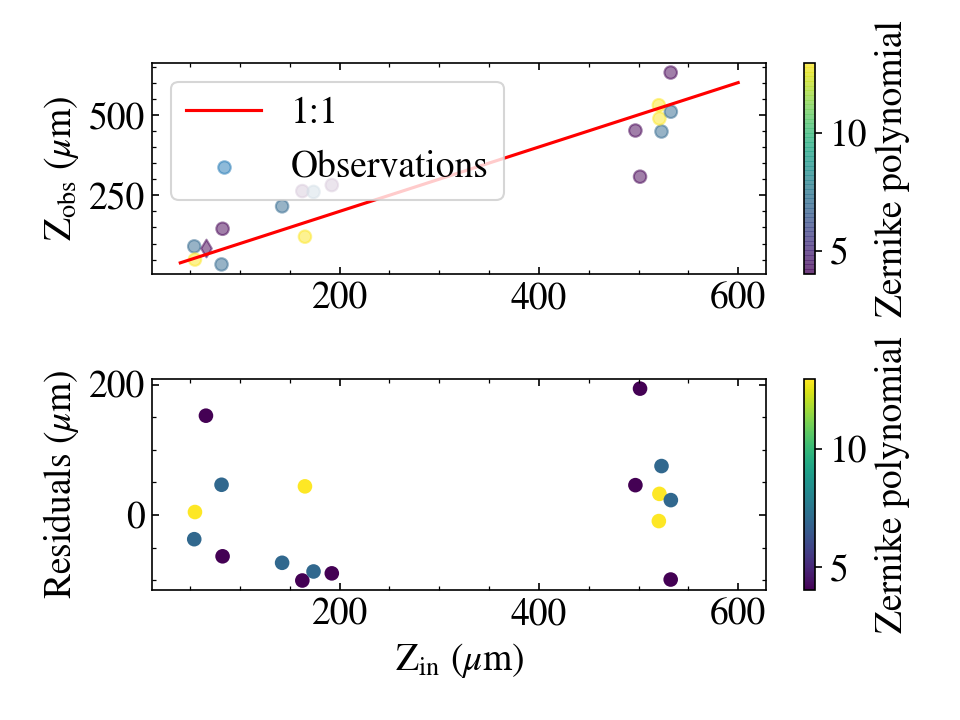

<IPython.core.display.Javascript object>


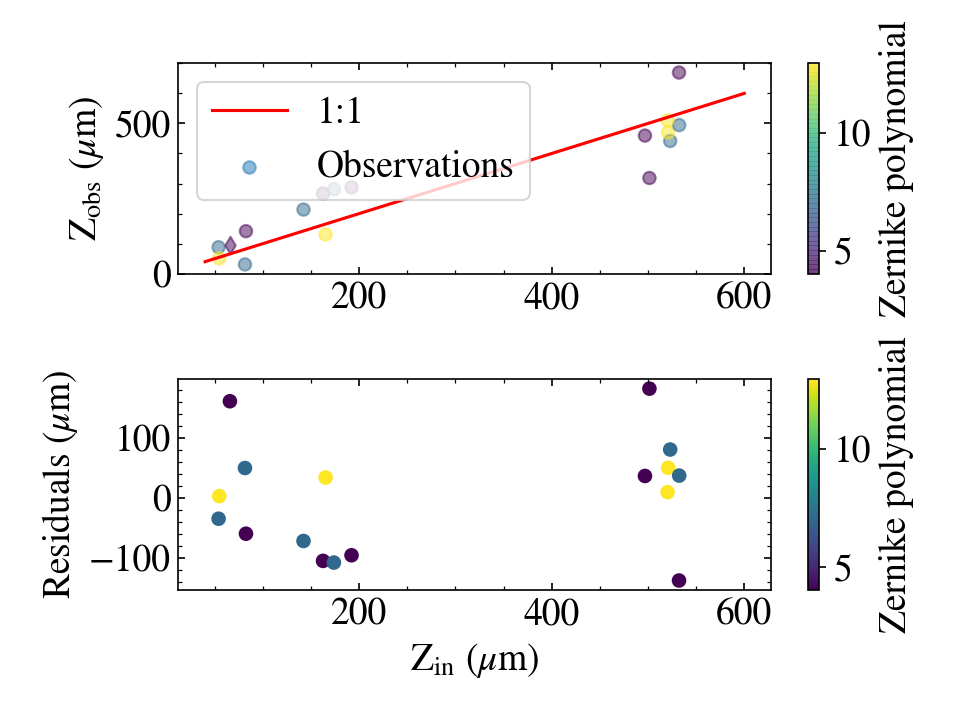

In [24]:
#plt.figure(dpi=150, figsize=(6,3))

iz, izv, izvas, zobscorr, zobs = order_zin_zout('zFitDict_45b.pickle', 'zFitDict_46b.pickle', correct=True)
plot_zin_zout(zobscorr, izvas, iz, output=None)
eta_res = aperture_efficiency_residuals(zindxs, zcoefs*1e6, eta_tot, iz, izvas, zobscorr*1e6)
#plt.plot(eta_res, 'b.')

iz, izv, izvas, zobscorr, zobs = order_zin_zout('zFitDict_47b.pickle', 'zFitDict_48b.pickle', correct=True)
plot_zin_zout(zobscorr, izvas, iz, output=None)
eta_res = aperture_efficiency_residuals(zindxs, zcoefs*1e6, eta_tot, iz, izvas, zobscorr*1e6)
#plt.plot(eta_res, 'r.')


#plt.plot(plt.gca().get_xlim(), [np.max(eta_tot)]*2, 'k:')

<IPython.core.display.Javascript object>


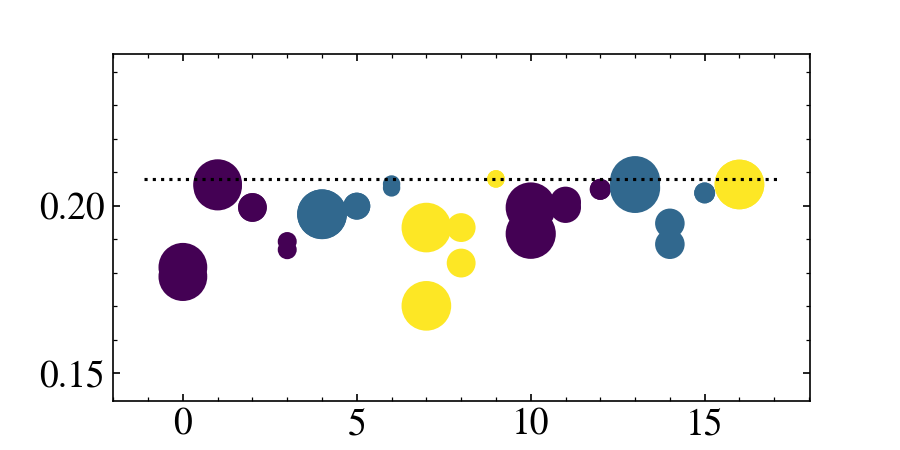

In [36]:
plt.figure(dpi=150, figsize=(6,3))

iz, izv, izvas, zobscorr, zobs = order_zin_zout('zFitDict_45b.pickle', 'zFitDict_46b.pickle', correct=True)
#plot_zin_zout(zobscorr, izvas, iz, output=None)
eta_res = aperture_efficiency_residuals(zindxs, zcoefs*1e6, eta_tot, iz, izvas, zobscorr*1e6)
plt.scatter(np.arange(len(eta_res)), eta_res, c=iz, s=izvas)

iz, izv, izvas, zobscorr, zobs = order_zin_zout('zFitDict_47b.pickle', 'zFitDict_48b.pickle', correct=True)
#plot_zin_zout(zobscorr, izvas, iz, output=None)
eta_res = aperture_efficiency_residuals(zindxs, zcoefs*1e6, eta_tot, iz, izvas, zobscorr*1e6)
plt.scatter(np.arange(len(eta_res)), eta_res, c=iz, s=izvas)

plt.plot(plt.gca().get_xlim(), [np.max(eta_tot)]*2, 'k:')

plt.minorticks_on()
plt.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)

In [34]:
np.power(0.19950608924037133/np.max(eta_tot), -2.)

1.0874118837432631

In [28]:
8*1.35

10.8

In [33]:
zfd = pickle.load( open('zFitDict_45b.pickle', 'rb') )
zfd['header']

{'scan0': 16,
 'scanf': 125,
 'nZern': 37,
 'signal_registration': False,
 'sigma_clip_diff': False,
 'kernel_size': 1,
 'do_replace_nans': False,
 'guess': [60.0, 0.0, 0.0, -50.0, 0.0, 0.0],
 'maskRadius': 50,
 'fixed_reference': True,
 'reference_scan': None,
 'signal_type': b'SIGNAL',
 'sigma': 3,
 'reference_scan_file': '/home/scratch/psalas/LASSI/gpus/output/2020_03_16_02:21:06.ptx.csv'}